# Time Series Analysis of Golden State Warriors' Shooting 1996-2017

In the recent years, the Golden State Warriors have been captivating fans across the world with their impeccable long distance shooting performance. I've web scraped their shooting data from 1996-2017.

One of the most common statements of the NBA of today is that number of 3 pointers that are being taken have increased drastically over the years at the cost of reducing the number of mid-range shots i.e. the "Mid Range game is dead". Let's try to quantify/visualize that and verify.


In [33]:
import requests
import csv
import json
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

DOWNLOAD_DELAY = 5

In [5]:
years_list = [x for x in range(1996,2018)]
for index,year in enumerate(years_list[:-1]):
    years_list[index] = str(year)+'-'+ str(years_list[index+1])[-2:]
years_list

['1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 2017]

These list of years is how the NBA Stats API maps each team's stats year. But wait that final value needs to be removed. That's a string the NBA Stats API won't recognize

In [6]:
years_list.pop();

In [7]:
years_dict = {}
dataframe_keys = ['overall_df', 'shot_5_ft_df', 'shot_8_ft_df', 'shot_area_df', 'assisted_shot_df', 'shot_type_df', 'assisted_by_df']
dataframe_keys

['overall_df',
 'shot_5_ft_df',
 'shot_8_ft_df',
 'shot_area_df',
 'assisted_shot_df',
 'shot_type_df',
 'assisted_by_df']

I will be storing the data in a dictionary of dictionaries. The outer dictionary will be the year and the inner dictionary will store the dataframes of each shooting stat type

In [8]:
for year in years_list:
    time.sleep(random.uniform(0,DOWNLOAD_DELAY))

    URL = 'http://stats.nba.com/stats/teamdashboardbyshootingsplits?' + \
    'DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&' + \
    'Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&' + \
    'PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlusMinus=N&Rank=N&' + \
    'Season=' + year + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&' + \
    'TeamID=1610612744&VsConference=&VsDivision='
    
    REQUEST_HEADERS = {
        'user-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:56.0) Gecko/20100101 Firefox/56.0',
        'From': 'rodellrodriguez53@gmail.com'
    }
    response = requests.get(URL, headers=REQUEST_HEADERS)
    response.raise_for_status()

    years_dict[year] = {}
    for index,(resultSets_dict,dataframe_name) in enumerate(zip(response.json()['resultSets'], dataframe_keys)):
        if dataframe_name not in years_dict[year]:
            years_dict[year][dataframe_name] =  pd.DataFrame(data=response.json()['resultSets'][index]['rowSet'], 
            columns=response.json()['resultSets'][index]['headers'])    

The outer for loop runs for every season between 1996-2017. So for each year we have to grab that team's respective shooting splits stats. Before grabbing each team's data I instill a delay of a random wait time between 0 and 5 seconds for courtesy and to not stress the NBA's production server. If you notice the way I am concatenating the URL strings, I concatenate the Season year based on the years_list I generated at the beginning. 

After grabbing the stats data, the inner for loop runs 7 times, each time updating the inner dictionary with a different shooting statline dataframe.

In [9]:
years_dict['1996-97']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,769,"Armstrong, B.J.",126,126,1.0,31,31,1.0,1.123,...,6,1,1,1,1,1,1,1,168,769
1,Assisted By,197,"Burrell, Scott",35,35,1.0,5,5,1.0,1.071,...,13,1,1,1,1,1,1,1,168,197
2,Assisted By,902,"Coles, Bimbo",149,149,1.0,34,34,1.0,1.114,...,7,1,1,1,1,1,1,1,168,902
3,Assisted By,692,"DeClercq, Andrew",32,32,1.0,10,10,1.0,1.156,...,3,1,1,1,1,1,1,1,168,692
4,Assisted By,957,"Fuller, Todd",24,24,1.0,8,8,1.0,1.167,...,2,1,1,1,1,1,1,1,168,957
5,Assisted By,923,"Marshall, Donyell",53,53,1.0,11,11,1.0,1.104,...,9,1,1,1,1,1,1,1,168,923
6,Assisted By,904,"Mullin, Chris",322,322,1.0,62,62,1.0,1.096,...,11,1,1,1,1,1,1,1,168,904
7,Assisted By,1077,"Owes, Ray",15,15,1.0,6,6,1.0,1.200,...,1,1,1,1,1,1,1,1,168,1077
8,Assisted By,899,"Price, Mark",342,342,1.0,48,48,1.0,1.070,...,14,1,1,1,1,1,1,1,168,899
9,Assisted By,691,"Roe, Lou",6,6,1.0,1,1,1.0,1.083,...,12,1,1,1,1,1,1,1,168,691


In [10]:
years_dict['2016-17']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2440,"Barnes, Matt",45,45,1.0,13,13,1.0,1.144,...,14,1,1,1,1,1,1,1,168,2440
1,Assisted By,203546,"Clark, Ian",90,90,1.0,27,27,1.0,1.150,...,12,1,1,1,1,1,1,1,168,203546
2,Assisted By,201939,"Curry, Stephen",524,524,1.0,163,163,1.0,1.156,...,11,1,1,1,1,1,1,1,168,201939
3,Assisted By,201142,"Durant, Kevin",300,300,1.0,130,130,1.0,1.217,...,3,1,1,1,1,1,1,1,168,201142
4,Assisted By,203110,"Green, Draymond",533,533,1.0,182,182,1.0,1.171,...,7,1,1,1,1,1,1,1,168,203110
5,Assisted By,2738,"Iguodala, Andre",261,261,1.0,85,85,1.0,1.163,...,9,1,1,1,1,1,1,1,168,2738
6,Assisted By,2733,"Livingston, Shaun",139,139,1.0,41,41,1.0,1.147,...,13,1,1,1,1,1,1,1,168,2733
7,Assisted By,1626172,"Looney, Kevon",29,29,1.0,13,13,1.0,1.224,...,2,1,1,1,1,1,1,1,168,1626172
8,Assisted By,203949,"McAdoo, James Michael",18,18,1.0,6,6,1.0,1.167,...,8,1,1,1,1,1,1,1,168,203949
9,Assisted By,1627775,"McCaw, Patrick",77,77,1.0,30,30,1.0,1.195,...,6,1,1,1,1,1,1,1,168,1627775


It works!

In [11]:
years_dict['2016-17']['shot_area_df']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Area,Restricted Area,1559,2328,0.670,0,0,0.000,0.670,219,...,1,7,1,3,4,5,4,4,173,Restricted Area
1,Shot Area,In The Paint (Non-RA),353,807,0.437,0,0,0.000,0.437,58,...,6,6,3,1,4,5,6,2,173,In The Paint (Non-RA)
2,Shot Area,Mid-Range,638,1443,0.442,0,0,0.000,0.442,19,...,5,5,2,2,4,5,5,3,173,Mid-Range
3,Shot Area,Left Corner 3,111,258,0.430,111,258,0.430,0.645,2,...,2,2,4,4,1,4,1,7,173,Left Corner 3
4,Shot Area,Right Corner 3,114,289,0.394,114,289,0.394,0.592,3,...,3,3,4,4,2,3,2,6,173,Right Corner 3
5,Shot Area,Above the Break 3,755,1983,0.381,755,1983,0.381,0.571,12,...,4,4,4,4,3,2,3,5,173,Above the Break 3
6,Shot Area,Backcourt,1,31,0.032,1,31,0.032,0.048,0,...,7,1,4,4,4,1,7,1,173,Backcourt


In [37]:
frames = []
for i, year in enumerate(years_list):
#Specifying the columns that are useful    
    frames.append(years_dict[year]['shot_area_df'][['GROUP_SET', 'GROUP_VALUE','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','EFG_PCT']])
    frames[i]['Year'] = pd.Series(year, index=frames[i].index)
final_shot_area_df = pd.concat(frames, ignore_index=True)
final_shot_area_df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,Year
0,Shot Area,Restricted Area,1270,2198,0.578,0,1,0.000,0.578,1996-97
1,Shot Area,In The Paint (Non-RA),398,900,0.442,0,0,0.000,0.442,1996-97
2,Shot Area,Mid-Range,1127,2854,0.395,280,748,0.374,0.444,1996-97
3,Shot Area,Left Corner 3,27,74,0.365,27,74,0.365,0.547,1996-97
4,Shot Area,Right Corner 3,33,77,0.429,33,77,0.429,0.643,1996-97
5,Shot Area,Above the Break 3,141,459,0.307,141,459,0.307,0.461,1996-97
6,Shot Area,Backcourt,0,4,0.000,0,4,0.000,0.000,1996-97
7,Shot Area,Restricted Area,1167,1974,0.591,0,0,0.000,0.591,1997-98
8,Shot Area,In The Paint (Non-RA),355,1152,0.308,0,0,0.000,0.308,1997-98
9,Shot Area,Mid-Range,1133,3060,0.370,0,0,0.000,0.370,1997-98


What I've done here is essentially placed all of the Shot Area dataframes in one dataframe but before I did that I inserted an extra column called 'Year' so I can distinguish which stat is coming from which year. This will prove useful to do a time series glance at GSW's FGM.

In [18]:
above_the_break_3 = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Above the Break 3']
above_the_break_3

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,Year
5,Shot Area,Above the Break 3,141,459,0.307,141,459,0.307,0.461,1996-97
12,Shot Area,Above the Break 3,155,572,0.271,154,571,0.270,0.406,1997-98
19,Shot Area,Above the Break 3,117,421,0.278,117,421,0.278,0.417,1998-99
26,Shot Area,Above the Break 3,257,834,0.308,257,834,0.308,0.462,1999-00
33,Shot Area,Above the Break 3,217,755,0.287,217,755,0.287,0.431,2000-01
40,Shot Area,Above the Break 3,250,783,0.319,250,783,0.319,0.479,2001-02
47,Shot Area,Above the Break 3,333,951,0.350,332,950,0.349,0.525,2002-03
54,Shot Area,Above the Break 3,308,933,0.330,308,933,0.330,0.495,2003-04
61,Shot Area,Above the Break 3,466,1317,0.354,465,1316,0.353,0.530,2004-05
68,Shot Area,Above the Break 3,434,1303,0.333,434,1303,0.333,0.500,2005-06


Above the Break 3 is right at the top of the 3 point line. If you visualize a point guard bringing the ball up the court and stopping by the middle of the 3 point line, that's the above the break area.

<IPython.core.display.Javascript object>


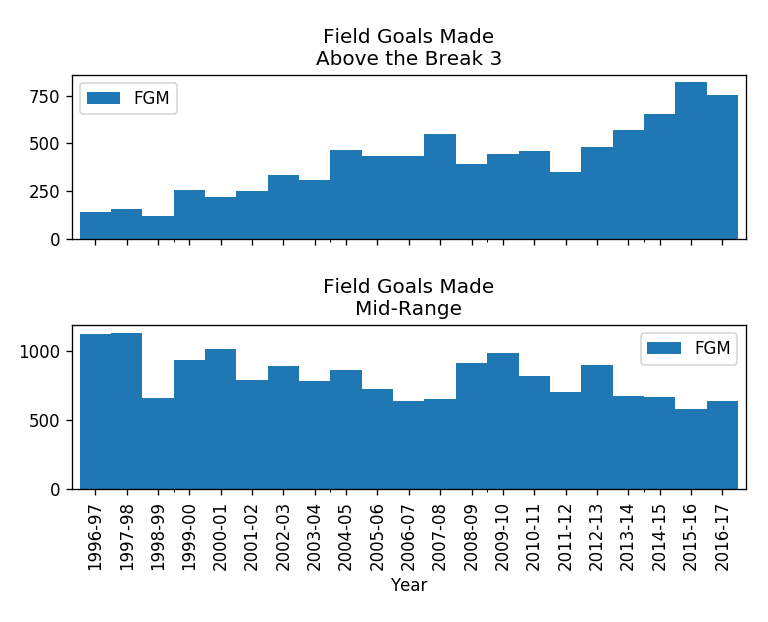

In [62]:
"""fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)

mid_range = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Mid-Range']
above_the_break_3.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nAbove the Break 3', ax=axes[0])
mid_range.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nMid-Range', ax=axes[1])

plt.tight_layout()  """

mid_range = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Mid-Range']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
above_the_break_3.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nAbove the Break 3', ax=ax1)
mid_range.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nMid-Range', ax=ax2)

plt.tight_layout()  

I purposely did not set the same y-axis for both graphs so we can see the patterns more clearly.

So while the number of made Above the Break 3 pointers have steadily increased from 1996-2017 and taken a sharp increase from 2012-2017, the number of made Mid-Range shots shows patterns of decreasing but it's not decreasing nearly as fast as Above the Break 3's increasing. As a matter of fact the last 4 seasons for FGM made for Mid Range show similar numbers between the years 2006-2008. 

2011 was the turning point in Top of the Break 3's when GSW drafted Klay Thompson followed by Draymond Green, Ezeli, and Barnes in 2012's draft.

Though the last 4 years have shown awfully consistent numbers of low mid range output and in 2016-16, when GSW achieved the best regular season record of all time, the number of mid-range shots made is less than half of what it was in 1996. 

So will 2017-2018 look the same?

<IPython.core.display.Javascript object>


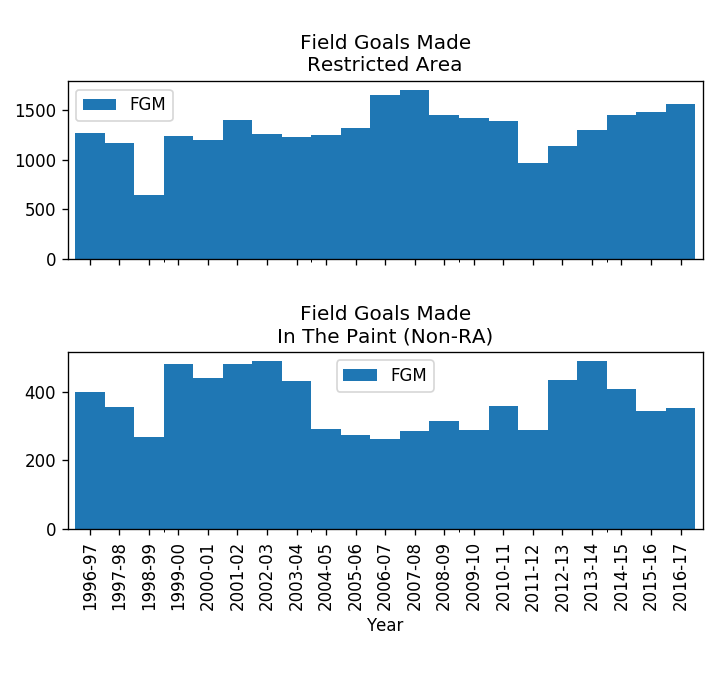

In [64]:
restricted_area = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Restricted Area']
in_the_paint_non_ra = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'In The Paint (Non-RA)']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
restricted_area.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nRestricted Area', ax=ax1)
in_the_paint_non_ra.plot.bar(x='Year',y='FGM', width=1, title='Field Goals Made\nIn The Paint (Non-RA)', ax=ax2)

plt.tight_layout()  

So interestingly enough, visually the rate of increase in the FGM for the Restrictive Area is identical to the rate of increase in the FGM for Above the Break 3's. This simultaenous consistent increase of FGM in both Above the Break 3's and Restrictive Area could be because of GSW's outside-inside style of play which opened up plenty of opportunities for their big men and backdoor cutters. 

